<a href="https://colab.research.google.com/github/mohammad2682/Covid-19/blob/master/CNN_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning Dataset from GitHub Reporsitory

In [1]:
!git clone https://github.com/mohammad2682/Covid19-Dataset

Cloning into 'Covid19-Dataset'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 2523 (delta 6), reused 0 (delta 0), pack-reused 2502
Receiving objects: 100% (2523/2523), 229.95 MiB | 24.25 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (4965/4965), done.


## Importing Liberaries

In [2]:
import numpy as np 
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

Using TensorFlow backend.


## Creating a 3layered CNN

In [4]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (7, 7), input_shape = (128, 128, 1)))
classifier.add(Dropout(0.3))
#classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(64, (7, 7), activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
classifier.add(Conv2D(128, (7, 7), activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#classifier.add(GlobalAveragePooling2D())
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
#optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
classifier.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 122, 122, 32)      1600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 122, 122, 32)      0         
_________________________________________________________________
activation_1 (Activation)    (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 64)        100416    
_________________________________________________________________
dropout_2 (Dropout)          (None, 55, 55, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 64)       

## Data Augmentation

In [5]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rotation_range=360, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('Covid19-Dataset/Covid-19-Dataset/train',
                                                    target_size = (128, 128),
                                                    color_mode="grayscale",
                                                    shuffle=True,
                                                    batch_size = 32,
                                                    class_mode = 'binary')
test_set = test_datagen.flow_from_directory('Covid19-Dataset/Covid-19-Dataset/test',
                                              target_size = (128, 128),
                                              color_mode="grayscale",
                                              shuffle=True,
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


## Training the Model

In [6]:
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

history = classifier.fit_generator(training_set,
                          steps_per_epoch = 8000,
                          epochs = 10,
                          callbacks=[annealer, checkpoint],
                          validation_data = test_set,
                          validation_steps = 2000)

Epoch 1/10
8000/8000 [==============================] - 1556s 195ms/step - loss: 0.4239 - accuracy: 0.7995 - val_loss: 0.9967 - val_accuracy: 0.6826

Epoch 00001: val_loss improved from inf to 0.99670, saving model to model.h5
Epoch 2/10
8000/8000 [==============================] - 1549s 194ms/step - loss: 0.2832 - accuracy: 0.8832 - val_loss: 0.1140 - val_accuracy: 0.7759

Epoch 00002: val_loss improved from 0.99670 to 0.11401, saving model to model.h5
Epoch 3/10
8000/8000 [==============================] - 1552s 194ms/step - loss: 0.2331 - accuracy: 0.9063 - val_loss: 0.0179 - val_accuracy: 0.7427

Epoch 00003: val_loss improved from 0.11401 to 0.01788, saving model to model.h5
Epoch 4/10
8000/8000 [==============================] - 1552s 194ms/step - loss: 0.2085 - accuracy: 0.9169 - val_loss: 0.1226 - val_accuracy: 0.7842

Epoch 00004: val_loss did not improve from 0.01788
Epoch 5/10
8000/8000 [==============================] - 1545s 193ms/step - loss: 0.1896 - accuracy: 0.9242 - v

##Plotting Acc and Loss Plots

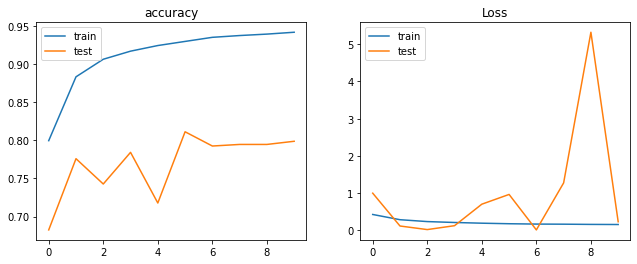

In [7]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.title('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.title('Loss')
plt.legend()
plt.subplots_adjust(right = 1.5)
plt.show()

## Confusion Matrix

Text(0.5, 145.31999999999996, 'Predicted')

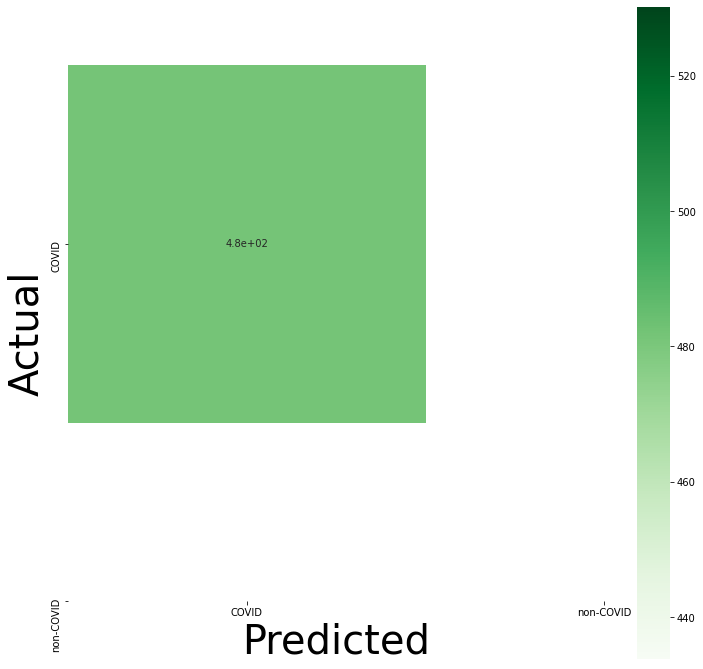

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

disease_types=['COVID', 'non-COVID']
Y_val = np.zeros((482,1))
Y_val[252:482] = 1
Y_pred = classifier.predict(test_set)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [15]:
result = classifier.predict(test_set)
y_test = np.zeros((482,1))
y_test[252:482] = 1
r = abs(np.round(result)-y_test).sum()
(482-r)/482

0.483402489626556

In [16]:
result = classifier.predict(training_set)
y_train = np.zeros((2000,1))
y_train[1000:2000] = 1
r = abs(np.round(result)-y_train).sum()
(2000-r)/2000

0.487